In [1]:
import yfinance as yf
ticker = yf.Ticker('AAPL').info
market_price = ticker['currentPrice']
previous_close_price = ticker['previousClose']
print('Ticker: AAPL')
print('Market Price:', market_price)
print('Previous Close Price:', previous_close_price)

Ticker: AAPL
Market Price: 175.16
Previous Close Price: 175.05


In [2]:
# Importing the yfinance package
import yfinance as yf
# Set the start and end date
start_date = '2020-05-19'
end_date = '2022-05-19'
# Set the ticker
ticker = 'AAPL'
# Get the data
data = yf.download(ticker, start_date, end_date)
# Print the last 5 rows
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-05-12  142.770004  146.199997  138.800003  142.559998  141.713791  \
2022-05-13  144.589996  148.100006  143.110001  147.110001  146.236801   
2022-05-16  145.550003  147.520004  144.179993  145.539993  144.676102   
2022-05-17  148.860001  149.770004  146.679993  149.240005  148.354156   
2022-05-18  146.850006  147.360001  139.899994  140.820007  139.984131   

               Volume  
Date                   
2022-05-12  182602000  
2022-05-13  113990900  
2022-05-16   86643800  
2022-05-17   78336300  
2022-05-18  109742900  


In [3]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
df = data['Close']
df

Date
2020-05-19     78.285004
2020-05-20     79.807503
2020-05-21     79.212502
2020-05-22     79.722504
2020-05-26     79.182503
                 ...    
2022-05-12    142.559998
2022-05-13    147.110001
2022-05-16    145.539993
2022-05-17    149.240005
2022-05-18    140.820007
Name: Close, Length: 505, dtype: float64

In [5]:
df = df.reset_index()
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df

,ds,y
0,2020-05-19,78.285004
1,2020-05-20,79.807503
2,2020-05-21,79.212502
3,2020-05-22,79.722504
4,2020-05-26,79.182503
...,...,...
500,2022-05-12,142.559998
501,2022-05-13,147.110001
502,2022-05-16,145.539993
503,2022-05-17,149.240005


In [6]:
import pandas as pd
from prophet import Prophet

In [7]:
m = Prophet()
m.fit(df)

23:35:41 - cmdstanpy - INFO - Chain [1] start processing
23:35:42 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
865,2023-05-14
866,2023-05-15
867,2023-05-16
868,2023-05-17
869,2023-05-18


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
865,2023-05-14,137.368512,87.988534,182.071020
866,2023-05-15,137.267737,88.666787,181.688804
867,2023-05-16,137.695040,88.435879,180.700152
868,2023-05-17,137.557627,88.210964,182.407935
869,2023-05-18,137.378037,87.469385,180.912578


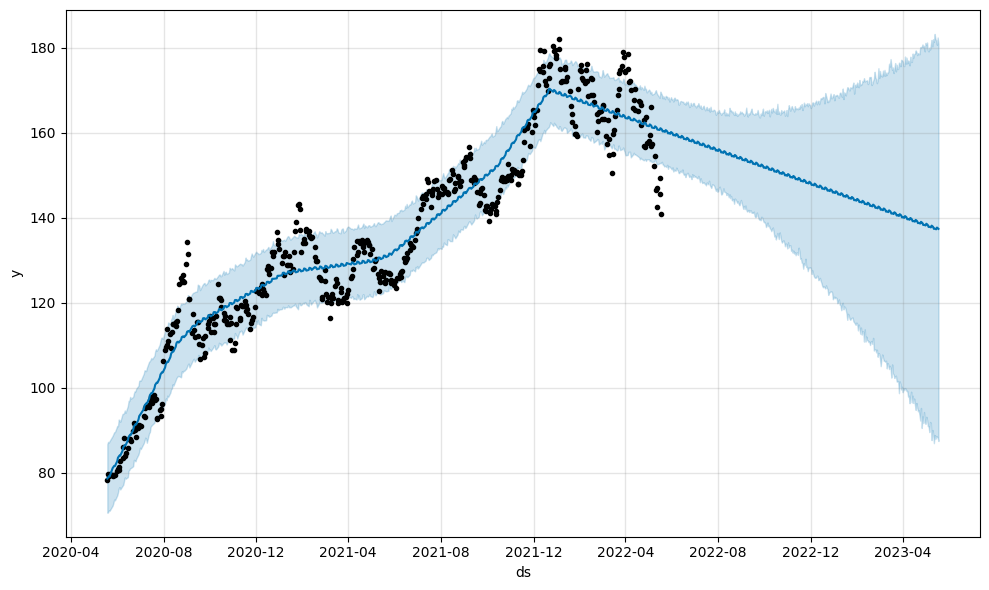

In [10]:
fig1 = m.plot(forecast)


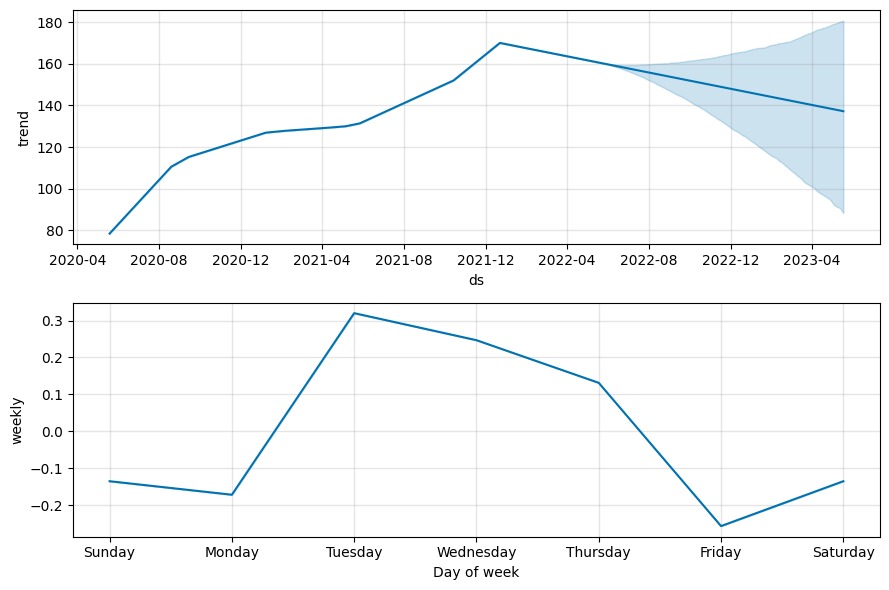

In [11]:
fig2 = m.plot_components(forecast)

In [14]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go
plot_plotly(m, forecast)

In [15]:
plot_components_plotly(m, forecast)


In [16]:
# Set the start and end date
start_date = '2020-05-19'
end_date = '2022-05-19'
# Set the ticker
ticker = 'GOOGL'
# Get the data
data = yf.download(ticker, start_date, end_date)
# Print the last 5 rows
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-05-12  111.377502  114.294998  109.824501  112.844002  112.844002  \
2022-05-13  114.532997  117.875000  113.605003  116.050499  116.050499   
2022-05-16  114.955498  116.169998  113.889503  114.445000  114.445000   
2022-05-17  116.840500  116.900002  114.870003  116.473000  116.473000   
2022-05-18  115.000000  115.400002  111.555496  111.899498  111.899498   

              Volume  
Date                  
2022-05-12  53836000  
2022-05-13  35038000  
2022-05-16  25990000  
2022-05-17  23054000  
2022-05-18  35126000  


In [17]:
df = data['Close']
df = df.reset_index()
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df

,ds,y
0,2020-05-19,68.720001
1,2020-05-20,70.458000
2,2020-05-21,70.337502
3,2020-05-22,70.662003
4,2020-05-26,71.068497
...,...,...
500,2022-05-12,112.844002
501,2022-05-13,116.050499
502,2022-05-16,114.445000
503,2022-05-17,116.473000


23:44:47 - cmdstanpy - INFO - Chain [1] start processing
23:44:48 - cmdstanpy - INFO - Chain [1] done processing


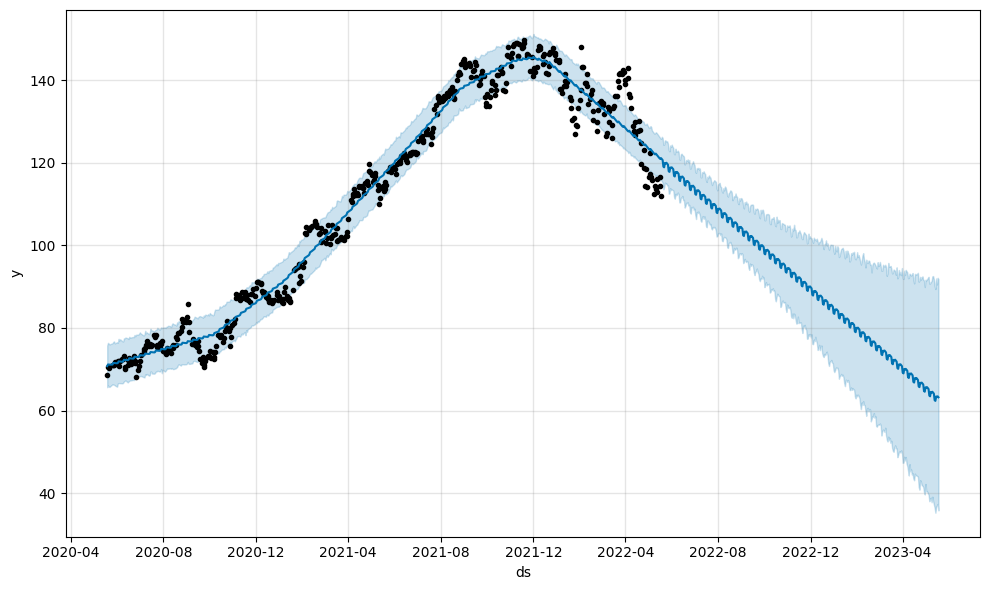

In [18]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

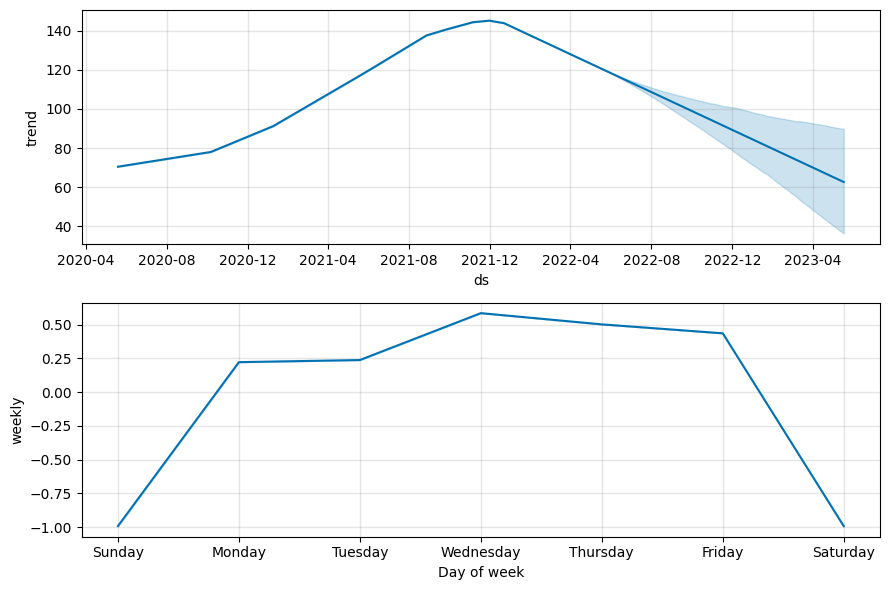

In [19]:
fig2 = m.plot_components(forecast)